In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

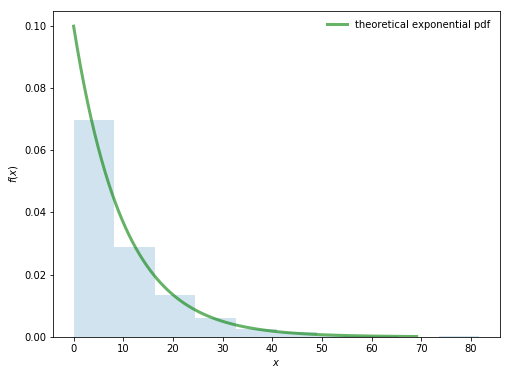

In [2]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))

# initialize seed and continuous distribution function
l = 0.1
np.random.seed(42)
distr = sts.expon(scale=1/l)

# calculate properties of the distribution (see https://en.wikipedia.org/wiki/Exponential_distribution)
# mean, var, _, _ = distr.stats(moments='mvsk')
mean = 1. / l
var = 1. / l**2

# generate x-coordinates
x = np.linspace(distr.ppf(0.001), distr.ppf(0.999), 100)

# calculate corresponding y-values
pdf = distr.pdf(x)
ax.plot(x, pdf ,'g-', lw=3, alpha=0.6, label='theoretical exponential pdf')

# generate sample of size 1000 from the distribution and plot histogram
r = distr.rvs(size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)

ax.legend(loc='best', frameon=False)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show()



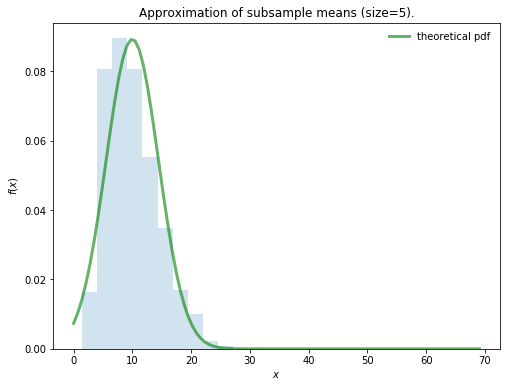

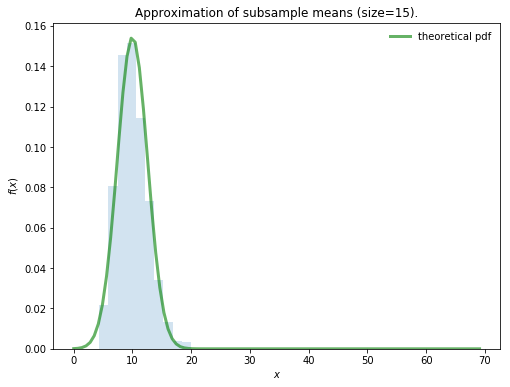

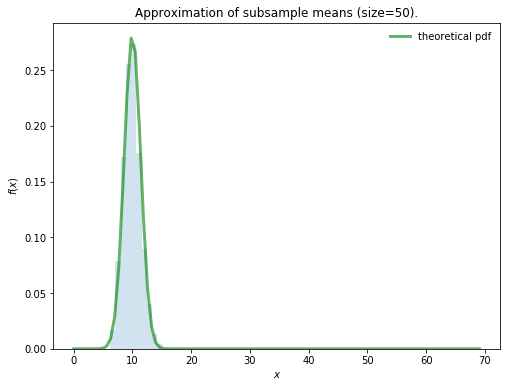

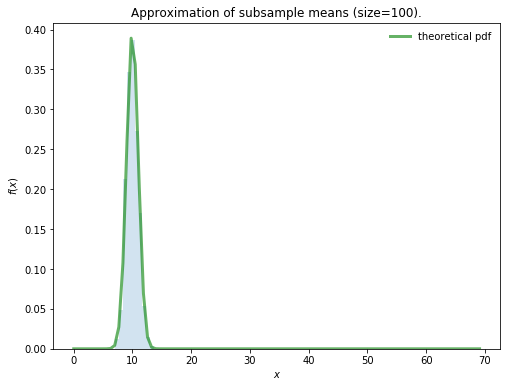

In [3]:
n_sizes = [5, 15, 50, 100]
n_exp = 1000

for n in n_sizes:
    fig, ax = plt.subplots(1, 1, figsize=(8,6))
    
    # calculate stdev for the normal distribution describing sample means. 
    stdev = np.sqrt(var / float(n))
    
    # build normal distribution with the given params
    norm_rv = sts.norm(mean, stdev)
    pdf = norm_rv.pdf(x)
    ax.plot(x, pdf ,'g-', lw=3, alpha=0.6, label='theoretical pdf')
    
    # calculate sample means and plot histogram
    means = [np.mean(distr.rvs(size=n)) for _ in xrange(n_exp)]
    ax.hist(means, density=True, histtype='stepfilled', alpha=0.2)

    ax.legend(loc='best', frameon=False)
    plt.title('Approximation of subsample means (size={}).'.format(n))
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$')

plt.show()

### Вывод: 
Нормальное распределение действительно позволяет довольно неплохо приблизить распределение выборочных средних (что и утверждает Центральная Предельная Теорема). Приближение работает даже в случаях, когда распределение оригинальной функции сильно отличается от нормального. При этом увеличение размера выборки позволяет повысить точность аппроксимации и уменьшить дисперсию.